<a href="https://colab.research.google.com/github/Apoo05/Introduction-au-deep-learning/blob/main/006_ca1_q4%2C5%2C6%2C7%2C8_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#updating keras and tensorflow for implementation of SqueezeNet
!pip install tensorflow==2.9
!pip install keras==2.9

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 73.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 81.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: Keras 2.1.1
    Uninstalling Keras-2.1.1:
      Successfully uninstalled Keras-2.1.1
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.3.3
    Uninstalling flatbuffers-23.3.3:
      Successfully uninstalled flatbuffers-23.3.3
  Attempting uninsta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten,Input, Conv2D, MaxPooling2D, concatenate, Dropout, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.models import Model

**Question 4**

In [4]:
#mounting drive to upload data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#to extract data from zip file
#!unzip '/content/drive/MyDrive/archive (16).zip' -d '/content/drive/MyDrive/ca_deep_learning/mango_leaves'

In [1]:
#to install splitfolders
!pip install split-folders[full]

In [6]:
#to split data automatically into train and validation data
import splitfolders
splitfolders.ratio("/content/drive/MyDrive/ca_deep_learning/mango_leaves",output="output1",seed=1337,ratio=(0.8,0.2))

Copying files: 4000 files [00:34, 115.95 files/s]


In [ ]:
#training data
train_ds=tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/ca_deep_learning/mango_leaves",validation_split=0.2,subset="training",seed=123,image_size=(240,320),batch_size=8)

Found 4000 files belonging to 8 classes.
Using 3200 files for training.


In [ ]:
#validation data
val_ds=tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/ca_deep_learning/mango_leaves",validation_split=0.2,subset="validation",seed=123,image_size=(240,320),batch_size=8)

Found 4000 files belonging to 8 classes.
Using 800 files for validation.


In [ ]:
#CNN model
model_q4=Sequential([
    layers.Rescaling(1./255,input_shape=(240,320,3)),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(96,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(512,activation='relu'),
    layers.Dense(8, activation='softmax')
])

In [ ]:
model_q4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the CNN model
history = model_q4.fit(train_ds, validation_data= val_ds,epochs=10, batch_size=128, verbose=1)

Epoch 1/10
400/400 [==============================] - 36s 49ms/step - loss: 1.6299 - accuracy: 0.3559 - val_loss: 1.2145 - val_accuracy: 0.5238
Epoch 2/10
400/400 [==============================] - 20s 50ms/step - loss: 0.9575 - accuracy: 0.6356 - val_loss: 0.6336 - val_accuracy: 0.7613
Epoch 3/10
400/400 [==============================] - 18s 46ms/step - loss: 0.5736 - accuracy: 0.7906 - val_loss: 0.4652 - val_accuracy: 0.8400
Epoch 4/10
400/400 [==============================] - 19s 46ms/step - loss: 0.4303 - accuracy: 0.8469 - val_loss: 0.6297 - val_accuracy: 0.7788
Epoch 5/10
400/400 [==============================] - 19s 47ms/step - loss: 0.3336 - accuracy: 0.8888 - val_loss: 0.5358 - val_accuracy: 0.8213
Epoch 6/10
400/400 [==============================] - 17s 43ms/step - loss: 0.2025 - accuracy: 0.9319 - val_loss: 0.4803 - val_accuracy: 0.8587
Epoch 7/10
400/400 [==============================] - 19s 47ms/step - loss: 0.1611 - accuracy: 0.9497 - val_loss: 0.3612 - val_accuracy:

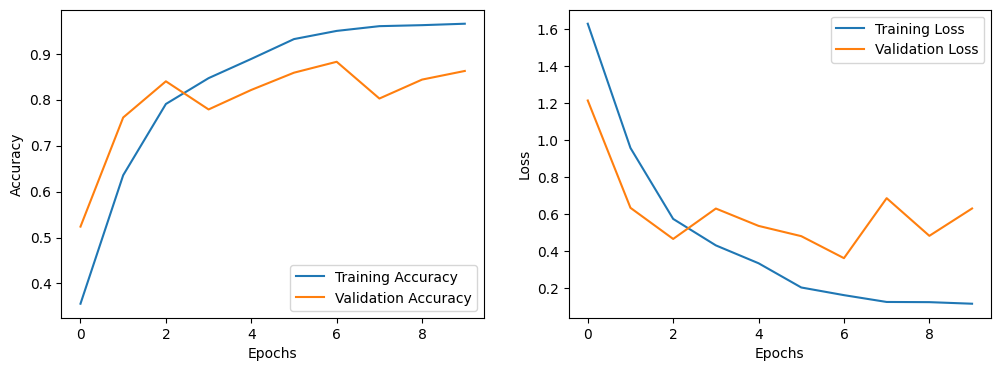

In [ ]:
# Plot accuracy and loss for CNN model
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
For the CNN Model, I have put three convultion layers, four fully connected layers and one dropout layer.This model was trained with training data and 86 percent accuracy was acheived.

SyntaxError: ignored

**question 5**

In [8]:
#data augmentation, used methods are horizontal flip,zoom,height shift,width shift,rotation_range
data_aug= ImageDataGenerator(
    horizontal_flip=True,
    zoom_range=0.1,
    height_shift_range=0.1,
    width_shift_range=0.1,
    rotation_range=10
)

In [9]:
#changing the size of images to 150*150 pixels
train_generator=data_aug.flow_from_directory("/content/output1/train",target_size=(150,150),batch_size=128)
validation_generator=data_aug.flow_from_directory("/content/output1/val",target_size=(150,150),batch_size=128)

Found 3200 images belonging to 8 classes.
Found 800 images belonging to 8 classes.


In [ ]:
#question 5 - CNN model
model_q5=Sequential([
    layers.Rescaling(1./255,input_shape=(150,150,3)),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(96,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(512,activation='relu'),
    layers.Dense(256,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(8, activation='softmax')
])

Similar to previous question CNN model with different no of neurons.

In [ ]:
model_q5.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

In [ ]:
history_q5= model_q5.fit(train_generator, validation_data=(validation_generator),epochs=10, verbose=1)

Epoch 1/10
25/25 [==============================] - 39s 1s/step - loss: 2.0722 - accuracy: 0.1562 - val_loss: 2.0830 - val_accuracy: 0.1250
Epoch 2/10
25/25 [==============================] - 31s 1s/step - loss: 1.6405 - accuracy: 0.3381 - val_loss: 1.4622 - val_accuracy: 0.4225
Epoch 3/10
25/25 [==============================] - 29s 1s/step - loss: 1.1732 - accuracy: 0.5428 - val_loss: 1.2575 - val_accuracy: 0.5537
Epoch 4/10
25/25 [==============================] - 30s 1s/step - loss: 0.9147 - accuracy: 0.6531 - val_loss: 0.8891 - val_accuracy: 0.6325
Epoch 5/10
25/25 [==============================] - 30s 1s/step - loss: 0.6671 - accuracy: 0.7478 - val_loss: 0.5757 - val_accuracy: 0.7837
Epoch 6/10
25/25 [==============================] - 30s 1s/step - loss: 0.5556 - accuracy: 0.7950 - val_loss: 0.4371 - val_accuracy: 0.8662
Epoch 7/10
25/25 [==============================] - 32s 1s/step - loss: 0.4233 - accuracy: 0.8475 - val_loss: 0.4045 - val_accuracy: 0.8413
Epoch 8/10
25/25 [==

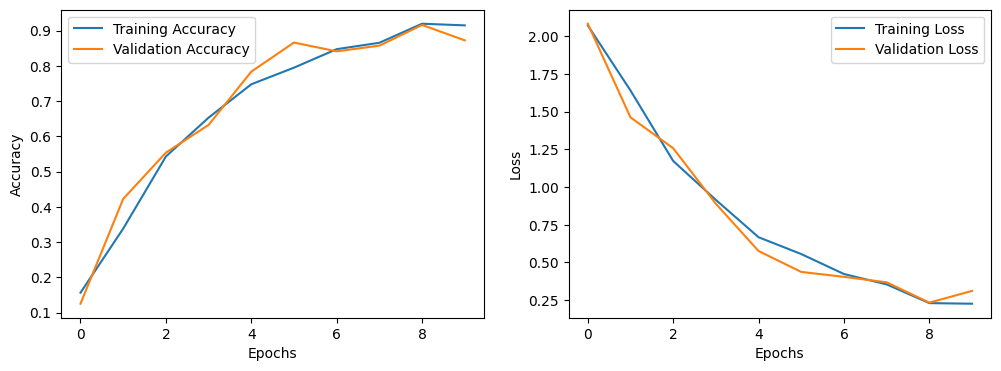

In [ ]:
# Plot accuracy and loss for augmented CNN model
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_q5.history['accuracy'], label='Training Accuracy')
plt.plot(history_q5y['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_q5.history['loss'], label='Training Loss')
plt.plot(history_q5.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


**question 6**

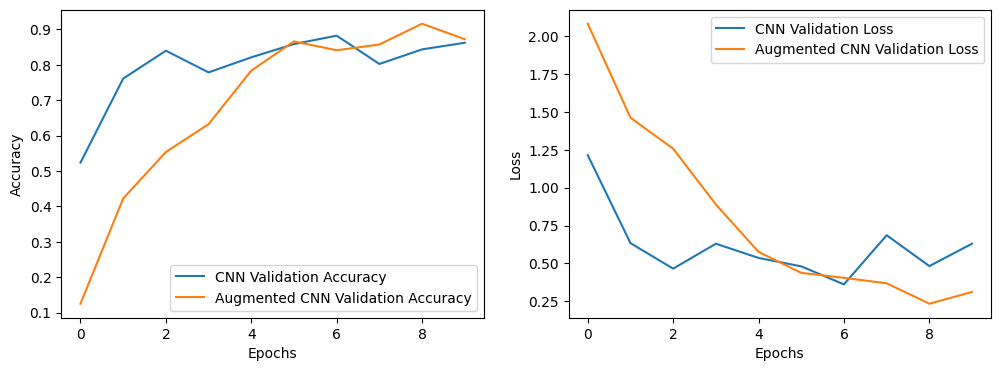

In [ ]:
#Question 6 comparing
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['val_accuracy'], label='CNN Validation Accuracy')
plt.plot(history_q5.history['val_accuracy'], label='Augmented CNN Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['val_loss'], label='CNN Validation Loss')
plt.plot(history_q5.history['val_loss'], label='Augmented CNN Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


The model using augmented data shows lower loss and better accuracy than the first CNN model.
( augmented model accuracy- 87% ; CNN Model - 86%)

**Question 7**

In [ ]:
#SqueezeNet implementation from scratch
def fire_module(x, squeeze_channels, expand1x1_channels, expand3x3_channels):
    squeeze = Conv2D(squeeze_channels, (1, 1), activation='relu', padding='same')(x)
    expand1x1 = Conv2D(expand1x1_channels, (1, 1), activation='relu', padding='same')(squeeze)
    expand3x3 = Conv2D(expand3x3_channels, (3, 3), activation='relu', padding='same')(squeeze)
    return concatenate([expand1x1, expand3x3], axis=-1)

def SqueezeNet(input_shape, num_classes):
    input_img = Input(shape=input_shape)

    x = Conv2D(96, (7, 7), strides=(2, 2), activation='relu', padding='same')(input_img)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

    x = fire_module(x, 16, 64, 64)
    x = fire_module(x, 16, 64, 64)
    x = fire_module(x, 32, 128, 128)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

    x = fire_module(x, 32, 128, 128)
    x = fire_module(x, 48, 192, 192)
    x = fire_module(x, 48, 192, 192)
    x = fire_module(x, 64, 256, 256)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

    x = fire_module(x, 64, 256, 256)

    x = Dropout(0.5)(x)
    x = Conv2D(num_classes, (1, 1), activation='relu', padding='same')(x)
    x = GlobalAveragePooling2D()(x)

    output = tf.keras.layers.Softmax()(x)

    model = Model(inputs=input_img, outputs=output)

    return model

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 240, 320, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_44 (Conv2D)             (None, 120, 160, 96  14208       ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d_21 (MaxPooling2D  (None, 60, 80, 96)  0           ['conv2d_44[0][0]']              
 )                                                                                          

The Fire Module is the key component, which consists of a squeeze layer followed by expand layers. The squeeze layer reduces the number of input channels, while the expand layers increase the number of channels. Downsample layers are used to reduce the spatial size of the feature maps through max pooling.

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

In [ ]:
#train the squeezenet model
history_squeezenet = model.fit(train_generator, validation_data=(validation_generator),epochs=10, verbose=1)

Epoch 1/10
25/25 [==============================] - 48s 1s/step - loss: 2.0816 - accuracy: 0.1209 - val_loss: 2.0794 - val_accuracy: 0.1250
Epoch 2/10
25/25 [==============================] - 33s 1s/step - loss: 2.0795 - accuracy: 0.1250 - val_loss: 2.0794 - val_accuracy: 0.1250
Epoch 3/10
25/25 [==============================] - 31s 1s/step - loss: 2.0794 - accuracy: 0.1234 - val_loss: 2.0794 - val_accuracy: 0.1250
Epoch 4/10
25/25 [==============================] - 31s 1s/step - loss: 2.0794 - accuracy: 0.1275 - val_loss: 2.0794 - val_accuracy: 0.1250
Epoch 5/10
25/25 [==============================] - 32s 1s/step - loss: 2.0794 - accuracy: 0.1222 - val_loss: 2.0794 - val_accuracy: 0.1250
Epoch 6/10
25/25 [==============================] - 32s 1s/step - loss: 2.0794 - accuracy: 0.1272 - val_loss: 2.0794 - val_accuracy: 0.1250
Epoch 7/10
25/25 [==============================] - 31s 1s/step - loss: 2.0794 - accuracy: 0.1325 - val_loss: 2.0794 - val_accuracy: 0.1250
Epoch 8/10
25/25 [==

**Question 8**

In [ ]:
#question 8
#squeeze pretrained model
squeezenet=tf.keras.applications.SqueezeNet(weights='imagenet',include_top=False,input_shape=(227,227,3))

AttributeError: ignored

In [ ]:
!pip install SqueezeNet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install git+https://github.com/rcmalli/keras-squeezenet.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/rcmalli/keras-squeezenet.git to /tmp/pip-req-build-ergqlwga
  Running command git clone --filter=blob:none --quiet https://github.com/rcmalli/keras-squeezenet.git /tmp/pip-req-build-ergqlwga
  Resolved https://github.com/rcmalli/keras-squeezenet.git to commit 4fb9cb7510ea0315303090edbc1bd97c2916af81
  Preparing metadata (setup.py) ... done


In [ ]:

from keras_squeezenet import SqueezeNet


model = SqueezeNet()

ModuleNotFoundError: ignored

reference:
#https://github.com/rcmalli/keras-squeezenet

Unable to implement pretrained model of SqueezeNet due to the above error.